# Crop Recommendation:

Crop prediction is an essential task for the decision-makers at national and regional levels for rapid decision-making. An accurate crop yield prediction model can help farmers to decide on what to grow and when to grow.
The dataset contains following 21 crops:
['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']



### Importing the libraries

In [1]:
# for manipulation
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
import ipywidgets
from ipywidgets import interact

# for warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data = pd.read_csv(r'C:\Users\T.Sireesha\Downloads\Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Data Preprocessing

In [3]:
# Checking missing values

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no null values present in our dataset.

In [4]:
# lets check the Crops present in this Dataset

data['label'].value_counts()

watermelon     100
jute           100
mungbean       100
mothbeans      100
banana         100
muskmelon      100
rice           100
grapes         100
cotton         100
apple          100
mango          100
chickpea       100
coffee         100
lentil         100
pomegranate    100
papaya         100
pigeonpeas     100
orange         100
kidneybeans    100
blackgram      100
maize          100
coconut        100
Name: label, dtype: int64

In [5]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# Shape of the Dataset

print("Shape of the Dataset : ",data.shape)

Shape of the Dataset :  (2200, 8)


Dataset contains 2200 records and 8 columns.

### Descriptive Statistics

In [8]:
# lets check the summary for all the crops

data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Lets check the Summary for each of the crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('watermelon', 'jute', 'mungbean', 'mothbeans', 'b…



We can find statistics of any other crop by selecting on drop down list

In [10]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

We can find rainfall,temperature,humidity,Nitrogen,Potassium,Phosphorous and ph value of every individual crop by selecting on the drop down menu.

In [11]:
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:",data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very High Temperature:",data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Temperature:",data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very Low Humidity:",data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low PH:",data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High PH:",data[data['ph'] >9]['label'].unique())

Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Temperature: ['grapes']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low PH: ['mothbeans']
Crops which requires very High PH: ['mothbeans']


In [12]:
# Lets understand which crops can only be drawn in summer season, winter season and Rainy season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


### Data Visualization

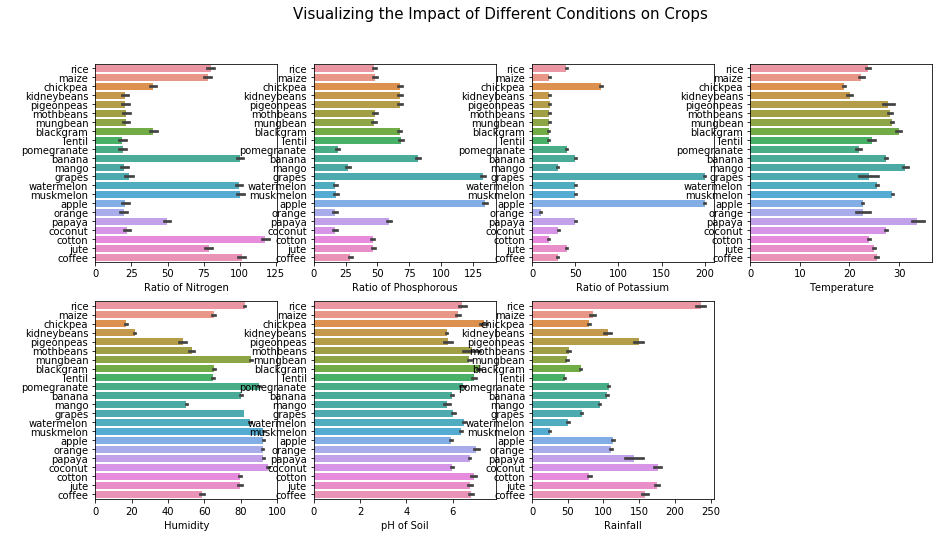

In [13]:

plt.figure(figsize=(15,8))

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

### Splitting the Data

In [14]:
# Split the Dataset for predictive modelling

x = data.drop(['label'],axis=1)
y = data['label']

print("Shape of x:", x.shape)
print("Shape of y:",y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [15]:
#Lets create Training set and Testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print("The shape of x train:",x_train.shape)
print("The shape of x test:",x_test.shape)
print("The shape of y train:",y_train.shape)
print("The shape of y test:",y_test.shape)

The shape of x train: (1760, 7)
The shape of x test: (440, 7)
The shape of y train: (1760,)
The shape of y test: (440,)


### Model Selection

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score


In [17]:
# lets create a Predictive Models

model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier()
}

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("\n", test + ' scores')
    print(acc)
    print("\n")
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)


 KNN scores
0.9772727272727273



 DT scores
0.9886363636363636




In [18]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')

,Model,Accuracy,Train_acc
1,DT,0.988636,1.000000
0,KNN,0.977273,0.988636


KNN accuracy is high and it does not overfit the training data

## Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
ac = accuracy_score(y_test, y_pred)
print("Accuracy: \n",ac,"\n")
cr = classification_report(y_test, y_pred)
print("Classification Report: \n",cr,"\n")

Accuracy: 
 0.9931818181818182 

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      0.95      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.95      0.95        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      1.00      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00

In [22]:
N = int(input("Enter Nitrogen value:    "))
P = int(input("Enter Phosphorous value: "))
K = int(input("Enter Potassium value:   "))
T= float(input("Enter temperature value: "))
H = float(input("Enter humidity value: "))
ph = float(input("Enter pH value: "))
R=float(input("Enter rainfall value: "))
prediction = classifier.predict([[N,P,K,T,H,ph,R]])
if(((N>=0)&(N<=140)) & ((P>=5)&(P<=145)) & ((K>=5)&(K<=205)) & ((T>=5)&(T<=44)) & ((H>=13)&(H<=100)) & 
   ((ph>=1)&(ph<=14)) & ((R>=8)&(R<=400))):
    print("The Suggested Crop for Given Climatic Condition is :", prediction)
else:
    print("No crop is availabel")

Enter Nitrogen value:    82
Enter Phosphorous value: 42
Enter Potassium value:   43
Enter temperature value: 24
Enter humidity value: 83
Enter pH value: 6
Enter rainfall value: 210
The Suggested Crop for Given Climatic Condition is : ['rice']



## Generating K- Nearest Neighbors Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
y_pred = kn_classifier.predict(x_test)

### Evaluating the Model

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
ac = accuracy_score(y_test, y_pred)
print("Accurracy: \n",ac,"\n")
cr = classification_report(y_test,y_pred)
print("Classification Report: \n",cr,"\n")

Accurracy: 
 0.9772727272727273 

Classification Report: 
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      0.94      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.79      0.90      0.84        21
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        17
       maize       0.95      1.00      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.0

### Real time Predictions

In [26]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [27]:
N = int(input("Enter Nitrogen value:    "))
P = int(input("Enter Phosphorous value: "))
K = int(input("Enter Potassium value:   "))
T= float(input("Enter temperature value: "))
H = float(input("Enter humidity value: "))
ph = float(input("Enter pH value: "))
R=float(input("Enter rainfall value: "))
prediction = kn_classifier.predict([[N,P,K,T,H,ph,R]])
if(((N>=0)&(N<=140)) & ((P>=5)&(P<=145)) & ((K>=5)&(K<=205)) & ((T>=5)&(T<=44)) & ((H>=13)&(H<=100)) & 
   ((ph>=1)&(ph<=14)) & ((R>=8)&(R<=400))):
    print("The Suggested Crop for Given Climatic Condition is :", prediction)
else:
    print("No crop is availabel")


Enter Nitrogen value:    56
Enter Phosphorous value: 47
Enter Potassium value:   100
Enter temperature value: 36
Enter humidity value: 78
Enter pH value: 8
Enter rainfall value: 255
The Suggested Crop for Given Climatic Condition is : ['papaya']
